<a href="https://colab.research.google.com/github/mayurn344/codesoftprojectml/blob/main/churn%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
# Handling missing values (if any)
imputer = SimpleImputer(strategy='mean')

# Applying imputation to the 'CreditScore' column
data['CreditScore'] = imputer.fit_transform(data[['CreditScore']])


In [4]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645.0,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822.0,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376.0,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501.0,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684.0,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
data.describe(include = 'all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


<ipython-input-7-8282da9efd0e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=data, palette=['purple', 'yellow'])


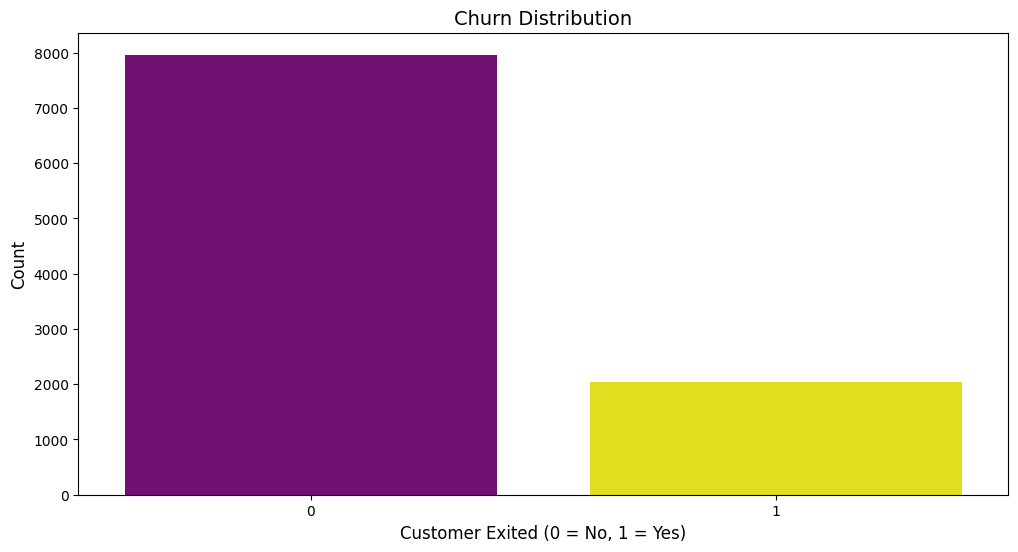

In [7]:
# Data exploration and visualization
plt.figure(figsize=(12, 6))

# Countplot for Churn Distribution
sns.countplot(x='Exited', data=data, palette=['purple', 'yellow'])

# Adding labels and title
plt.xlabel('Customer Exited (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Churn Distribution', fontsize=14)

# Display the plot
plt.show()


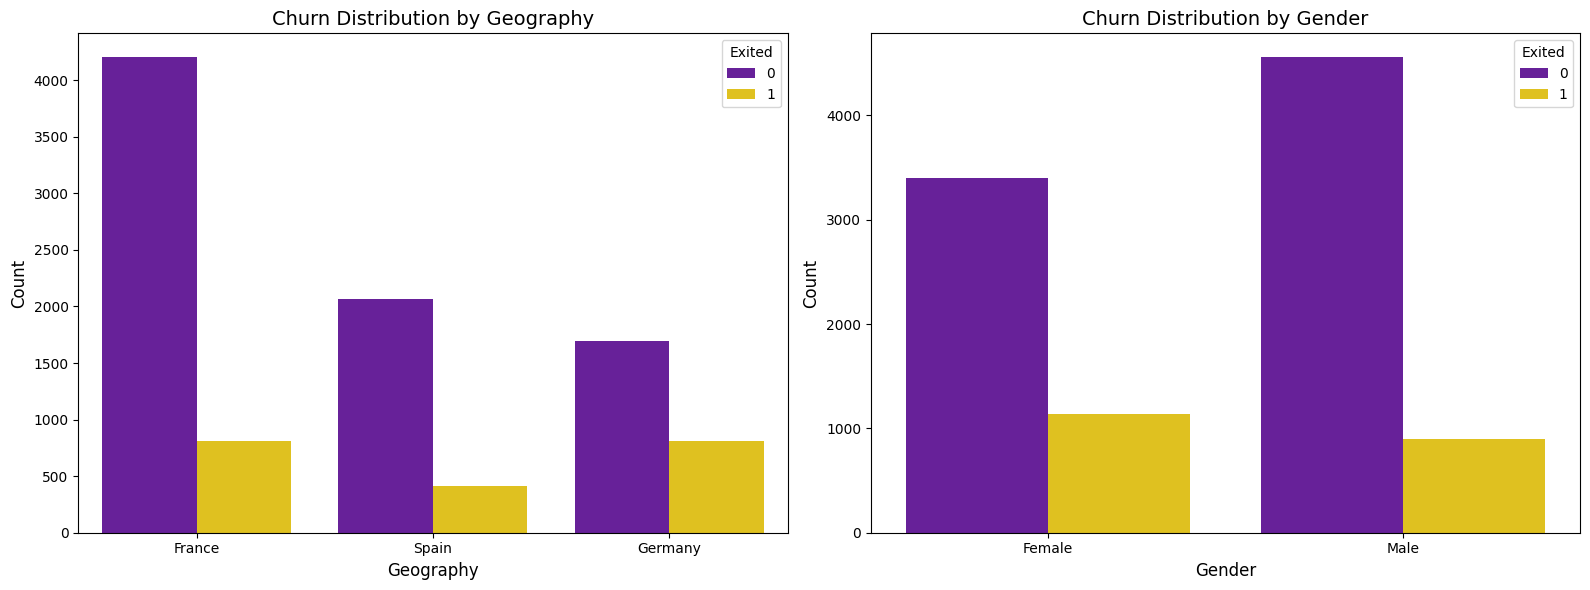

In [8]:
# Explore categorical features with churn distribution
plt.figure(figsize=(16, 6))

# Churn by Geography
plt.subplot(1, 2, 1)
sns.countplot(x='Geography', hue='Exited', data=data, palette=['#6a0dad', '#FFD700'])
plt.title('Churn Distribution by Geography', fontsize=14)
plt.xlabel('Geography', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Churn by Gender
plt.subplot(1, 2, 2)
sns.countplot(x='Gender', hue='Exited', data=data, palette=['#6a0dad', '#FFD700'])
plt.title('Churn Distribution by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show plot
plt.show()


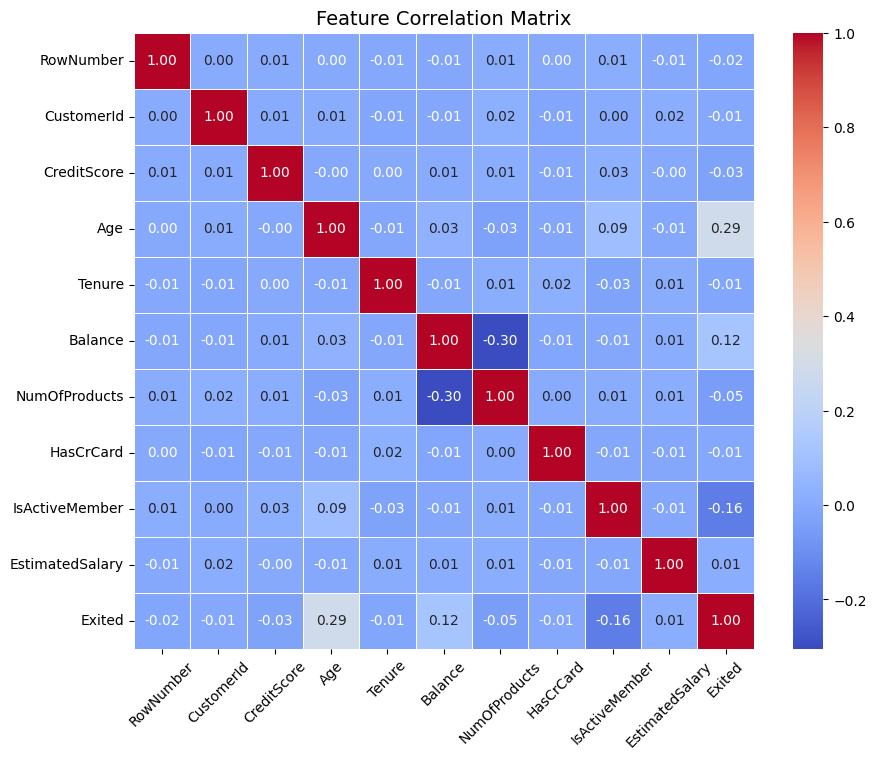

In [10]:
# Drop non-numeric columns dynamically
numerical_data = data.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numerical_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Add title and adjust labels
plt.title('Feature Correlation Matrix', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show plot
plt.show()


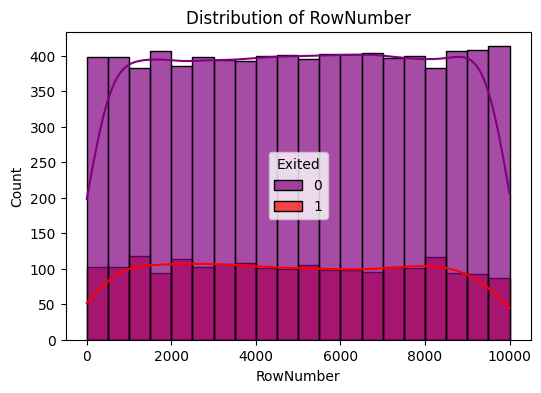

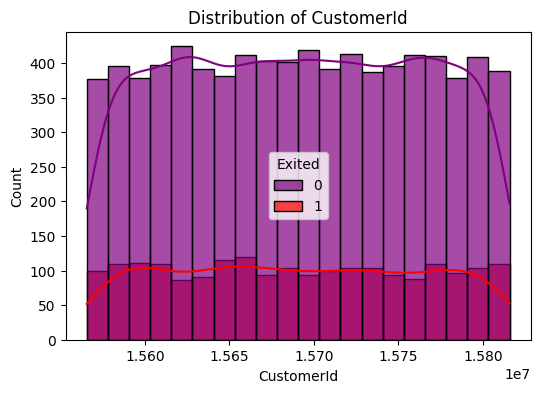

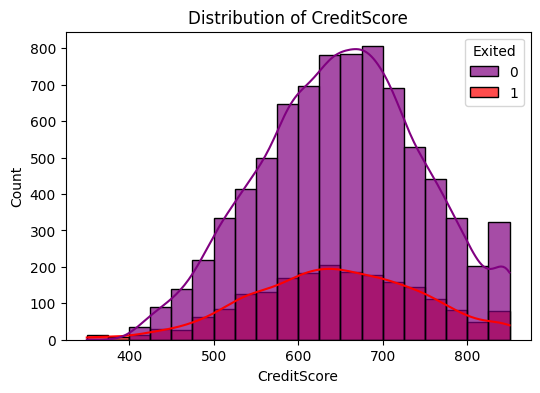

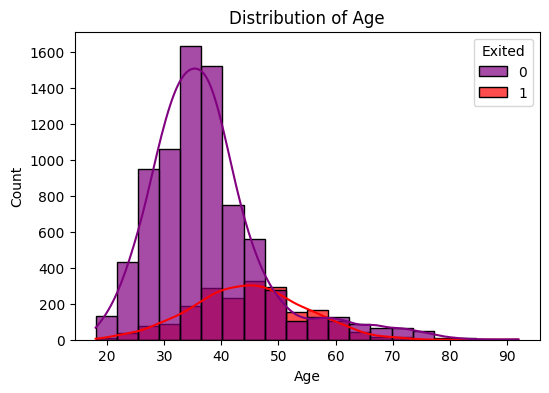

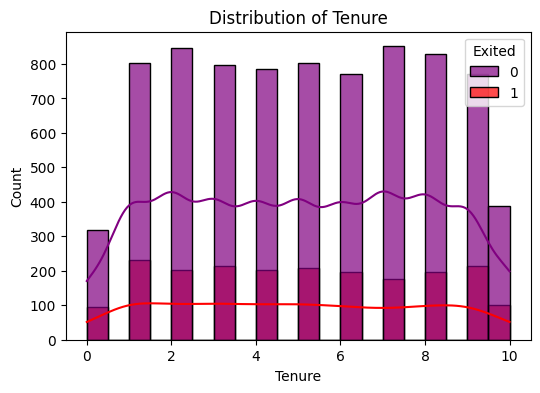

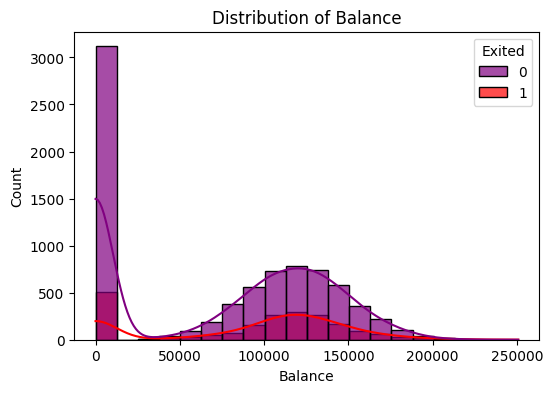

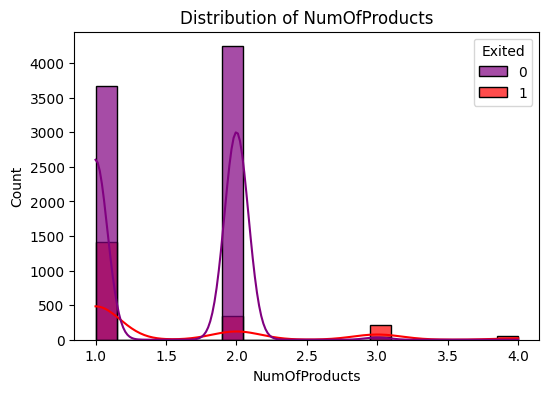

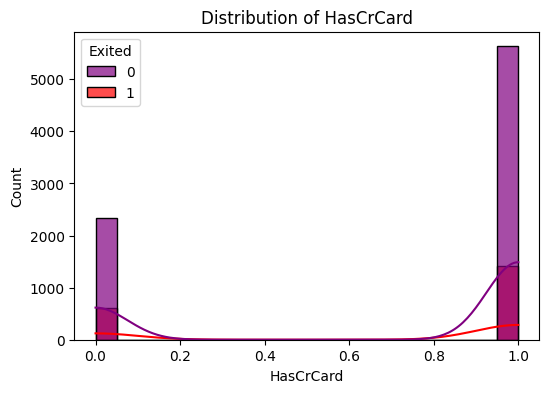

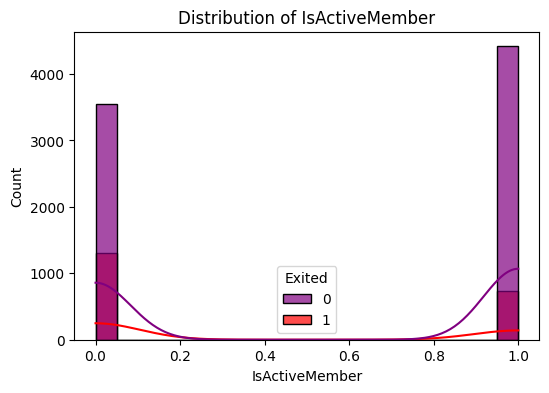

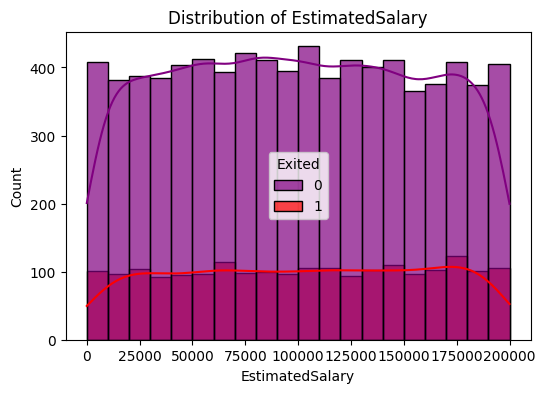

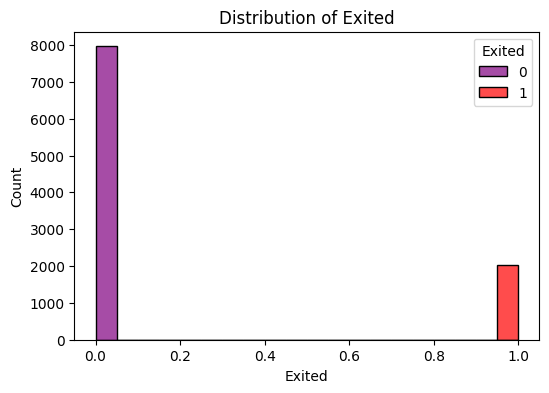

In [11]:
# Select numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns

# Histograms of Numerical Features
for col in numerical_cols:
    fig, ax = plt.subplots(figsize=(6, 4))

    # Plot histogram
    sns.histplot(data=data, x=col, hue='Exited', kde=True, bins=20,
                 palette=['purple', 'red'], alpha=0.7, edgecolor='black', ax=ax)

    # Formatting
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)

    # Show plot
    plt.show()


In [14]:
# Dictionary to store label encoders
label_encoders = {}

# Categorical columns to encode
categorical_cols = ['Gender', 'Geography']

# Apply Label Encoding
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

    # Print encoding mapping (optional)
    print(f"Encoding for {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")


Encoding for Gender: {'Female': 0, 'Male': 1}
Encoding for Geography: {'France': 0, 'Germany': 1, 'Spain': 2}


In [17]:
# Define features (X) and target variable (y)
X = data.drop(columns=['Exited', 'Surname', 'CustomerId'])
y = data['Exited']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print dataset split sizes
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Training set: 8000 samples
Test set: 2000 samples


In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}


🔹 Model: Logistic Regression
Accuracy: 0.81
Precision: 0.59
Recall: 0.14
F1-Score: 0.23
ROC AUC: 0.771204177983839
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.14      0.23       407

    accuracy                           0.81      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.81      0.76      2000



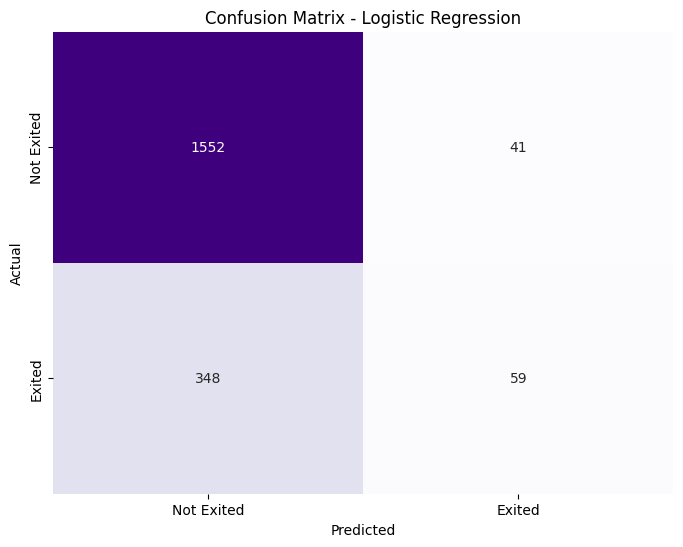


🔹 Model: Random Forest
Accuracy: 0.86
Precision: 0.76
Recall: 0.42
F1-Score: 0.54
ROC AUC: 0.8510667832701732
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1593
           1       0.76      0.42      0.54       407

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



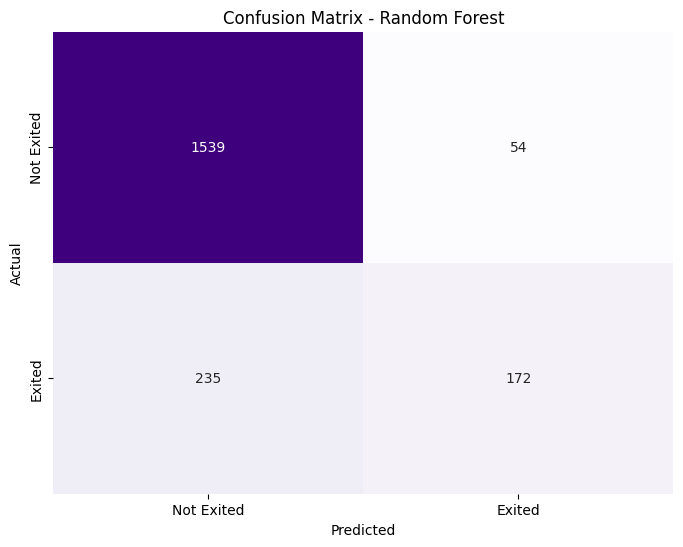


🔹 Model: Gradient Boosting
Accuracy: 0.87
Precision: 0.79
Recall: 0.49
F1-Score: 0.61
ROC AUC: 0.8653422297490093
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.49      0.61       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



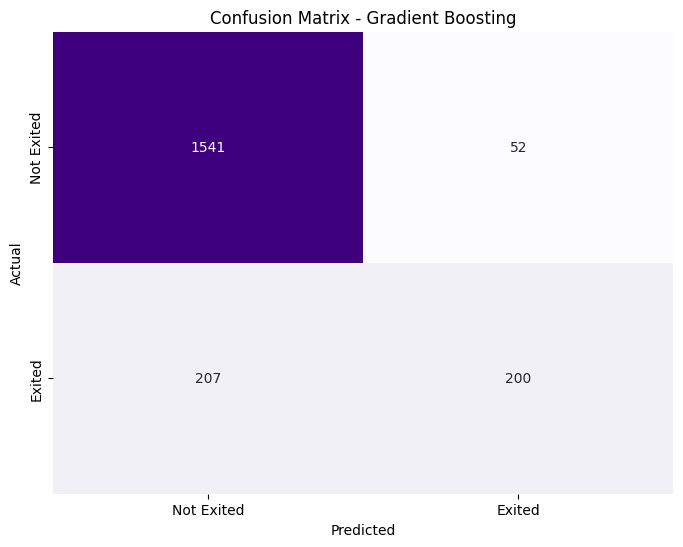

In [26]:
# Check if `models` dictionary exists
if 'models' not in locals():
    raise NameError("The 'models' dictionary is not defined. Please define it before running this block.")

# Iterate over all models in the dictionary
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Predictions
    y_pred = model.predict(X_test)

    # Model Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Handle models that don’t support predict_proba()
    if hasattr(model, "predict_proba"):
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    else:
        roc_auc = "N/A"

    # Print Model Performance
    print(f"\n🔹 Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc}")
    print("-" * 60)

    # Print Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot Confusion Matrix Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False, xticklabels=["Not Exited", "Exited"], yticklabels=["Not Exited", "Exited"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()